In [4]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt 
import seaborn as sns

import scipy.stats as stats

from sklearn.model_selection import train_test_split, GridSearchCV, cross_validate
from sklearn.linear_model import LinearRegression, Ridge, RidgeCV, Lasso, LassoCV, ElasticNet, ElasticNetCV
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

from yellowbrick.regressor import PredictionError, ResidualsPlot
from yellowbrick.model_selection import FeatureImportances
from yellowbrick.features import RadViz

plt.rcParams["figure.figsize"] = (9,5)
import warnings
warnings.filterwarnings('ignore')
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

---

## Used Car Price Prediction

<br>

In [5]:
df = pd.read_csv('final_scout_not_dummy.csv')

In [7]:
df.sample(3).T

,8823,4101,4325
make_model,Opel Corsa,Audi A3,Audi A3
body_type,Compact,Sedans,Sedans
price,4990,19499,17440
vat,VAT deductible,VAT deductible,VAT deductible
km,79000.0,28874.0,25850.0
Type,Used,Used,Used
Fuel,Benzine,Diesel,Diesel
Gears,5.0,6.0,6.0
Comfort_Convenience,"Air conditioning,Cruise control,Electrical sid...","Air conditioning,Automatic climate control,Pow...","Air conditioning,Armrest,Cruise control,Electr..."
Entertainment_Media,"Bluetooth,Hands-free equipment,On-board comput...",Bluetooth,"Bluetooth,CD player,Hands-free equipment,MP3,O..."


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15915 entries, 0 to 15914
Data columns (total 23 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   make_model           15915 non-null  object 
 1   body_type            15915 non-null  object 
 2   price                15915 non-null  int64  
 3   vat                  15915 non-null  object 
 4   km                   15915 non-null  float64
 5   Type                 15915 non-null  object 
 6   Fuel                 15915 non-null  object 
 7   Gears                15915 non-null  float64
 8   Comfort_Convenience  15915 non-null  object 
 9   Entertainment_Media  15915 non-null  object 
 10  Extras               15915 non-null  object 
 11  Safety_Security      15915 non-null  object 
 12  age                  15915 non-null  float64
 13  Previous_Owners      15915 non-null  float64
 14  hp_kW                15915 non-null  float64
 15  Inspection_new       15915 non-null 

In [47]:
for i in df.select_dtypes('object').columns:
    if len(df[i].unique())<100:
        print(i , "\n""\n", df[i].value_counts(),"\n","\n","**********************************""\n\n")
        
    else :
        print("\n","***",i,"***","\n")

make_model 

 Audi A3           3097
Audi A1           2614
Opel Insignia     2598
Opel Astra        2525
Opel Corsa        2216
Renault Clio      1839
Renault Espace     991
Renault Duster      34
Audi A2              1
Name: make_model, dtype: int64 
 
 **********************************


body_type 

 Sedans           8004
Station wagon    3677
Compact          3240
Van               817
Transporter        88
Off-Road           56
Coupe              25
Convertible         8
Name: body_type, dtype: int64 
 
 **********************************


vat 

 VAT deductible      15044
Price negotiable      871
Name: vat, dtype: int64 
 
 **********************************


Type 

 Used              11095
New                1649
Pre-registered     1364
Employee's car     1011
Demonstration       796
Name: Type, dtype: int64 
 
 **********************************


Fuel 

 Benzine     8548
Diesel      7298
LPG/CNG       64
Electric       5
Name: Fuel, dtype: int64 
 
 ************************

__To do list :__

- _Make_model :_ Drop "Audi A2"
- _Body_type :_ Create another column named 'Other' for Off-Road,Coupe and Convertible columns.
- _Fuel :_ Drop the ones where fuel = electric
- _Drive_chain :_ Drop the ones where Drive_chain = rear
- ** Come back again 'Comfort_Convenience', 'Entertainment_Media','Extras','Safety_Security' columns.

In [50]:
df = df[df['make_model'] != 'Audi A2']

In [70]:
df['body_type'].replace({'Transporter': 'Other',
                        'Off-Road': 'Other',
                        'Coupe': 'Other',
                        'Convertible': 'Other'}, inplace=True)

In [71]:
df.body_type.value_counts()

Sedans           8004
Station wagon    3677
Compact          3240
Van               817
Other             176
Name: body_type, dtype: int64

In [74]:
df = df[df.Fuel != 'Electric']

In [75]:
df.Fuel.value_counts()

Benzine    8548
Diesel     7297
LPG/CNG      64
Name: Fuel, dtype: int64

In [76]:
df.Drive_chain.value_counts()

front    15701
4WD        204
rear         4
Name: Drive_chain, dtype: int64

In [79]:
df = df[df.Drive_chain != 'rear']

In [80]:
df.Drive_chain.value_counts()

front    15701
4WD        204
Name: Drive_chain, dtype: int64

In [82]:
df.drop(['Comfort_Convenience', 'Entertainment_Media','Extras','Safety_Security'], axis = 1, inplace = True)

In [83]:
df.columns

Index(['make_model', 'body_type', 'price', 'vat', 'km', 'Type', 'Fuel', 'Gears', 'age', 'Previous_Owners', 'hp_kW', 'Inspection_new', 'Paint_Type', 'Upholstery_type', 'Gearing_Type', 'Displacement_cc', 'Weight_kg', 'Drive_chain', 'cons_comb'], dtype='object')

In [84]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15905 entries, 0 to 15914
Data columns (total 19 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   make_model       15905 non-null  object 
 1   body_type        15905 non-null  object 
 2   price            15905 non-null  int64  
 3   vat              15905 non-null  object 
 4   km               15905 non-null  float64
 5   Type             15905 non-null  object 
 6   Fuel             15905 non-null  object 
 7   Gears            15905 non-null  float64
 8   age              15905 non-null  float64
 9   Previous_Owners  15905 non-null  float64
 10  hp_kW            15905 non-null  float64
 11  Inspection_new   15905 non-null  int64  
 12  Paint_Type       15905 non-null  object 
 13  Upholstery_type  15905 non-null  object 
 14  Gearing_Type     15905 non-null  object 
 15  Displacement_cc  15905 non-null  float64
 16  Weight_kg        15905 non-null  float64
 17  Drive_chain 

<AxesSubplot:>

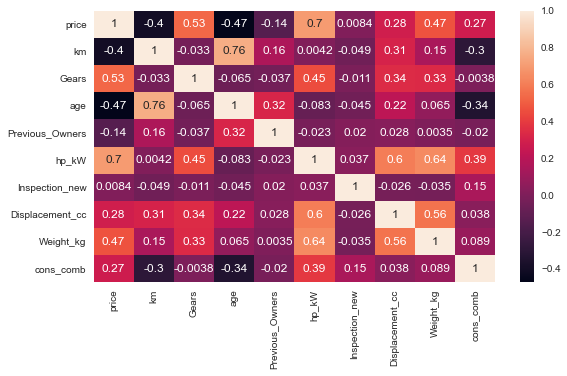

In [85]:
sns.heatmap(df.corr(), annot = True)

In [90]:
for i in df.columns:
    print(i)

make_model
body_type
price
vat
km
Type
Fuel
Gears
age
Previous_Owners
hp_kW
Inspection_new
Paint_Type
Upholstery_type
Gearing_Type
Displacement_cc
Weight_kg
Drive_chain
cons_comb


In [100]:
df.price.corr(df.columns)

TypeError: unsupported type: <class 'pandas.core.indexes.base.Index'>

In [101]:
df.columns

Index(['make_model', 'body_type', 'price', 'vat', 'km', 'Type', 'Fuel', 'Gears', 'age', 'Previous_Owners', 'hp_kW', 'Inspection_new', 'Paint_Type', 'Upholstery_type', 'Gearing_Type', 'Displacement_cc', 'Weight_kg', 'Drive_chain', 'cons_comb'], dtype='object')

In [125]:
for i in df.select_dtypes(['int64','float64']).columns:
        corr_i = df['price'].corr(df[i])
        print(i, " : ",round(corr_i,2))
    

price  :  1.0
km  :  -0.4
Gears  :  0.53
age  :  -0.47
Previous_Owners  :  -0.14
hp_kW  :  0.7
Inspection_new  :  0.01
Displacement_cc  :  0.28
Weight_kg  :  0.47
cons_comb  :  0.27


In [115]:
df.price.dtype

dtype('int64')